In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.shape

(2290, 6)

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


/tmp/ipython-input-3736964373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

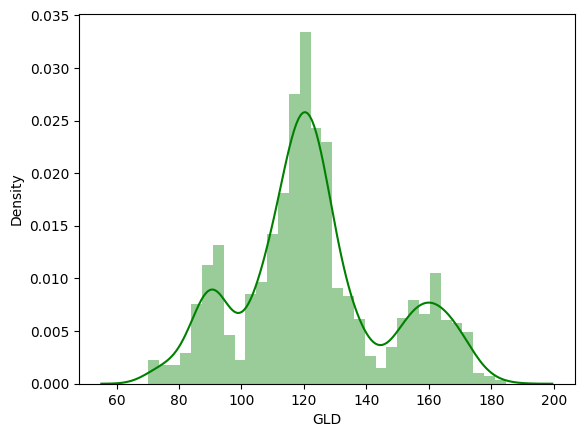

In [ ]:
sns.distplot(df['GLD'],color='green')

In [ ]:
X = df.drop(['Date','GLD'],axis=1)

In [ ]:
Y = df['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
X.shape,X_train.shape,X_test.shape

((2290, 4), (1832, 4), (458, 4))

In [ ]:
model = RandomForestRegressor(n_estimators=100)

In [ ]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
test_data_accuracy = model.predict(X_test)

In [ ]:
print(test_data_accuracy)

[168.67489974  82.03419991 116.47460015 127.67190067 120.71970165
 154.75039823 150.45499871 126.19540048 117.54409863 125.93030047
 116.83760081 170.88200074 141.14999898 167.86729815 115.2623001
 117.5504002  137.55310333 170.35740122 159.98680335 158.93439977
 155.10589984 125.1532001  176.11100082 156.90820379 125.22940039
  93.79739978  77.3718002  120.60970008 119.06729923 167.53459915
  88.12270058 125.17570026  91.14890053 117.73150009 121.09519925
 136.51190145 115.37360109 115.31870072 149.23490023 107.18140112
 103.81540227  87.23209798 126.48440061 117.80549986 154.05489976
 119.59090028 108.3655001  107.82799865  93.23700063 127.18859754
  75.41849995 113.57889961 121.23040029 111.22709929 118.78639864
 120.91159906 159.15959985 168.71060057 147.0950964   86.00449868
  94.1751003   86.91309903  90.4306     118.97840102 126.45830039
 127.46920017 169.46409986 122.28289954 117.46189903  98.57540051
 168.45210129 143.09659918 132.13280294 121.09940205 121.17009942
 119.797000

In [ ]:
errorscore = metrics.r2_score(Y_test,test_data_accuracy)
print(errorscore)

0.9893320954340192


In [ ]:
Y_test = list(Y_test)


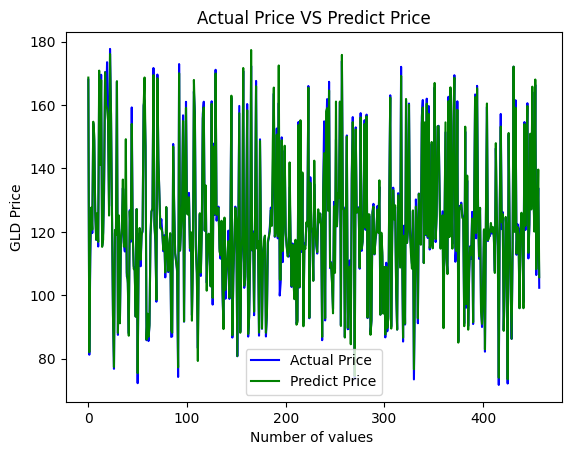

In [ ]:
plt.plot(Y_test,color='blue',label='Actual Price')
plt.plot(test_data_accuracy,color='green',label='Predict Price')
plt.title('Actual Price VS Predict Price')
plt.xlabel('Number of values ')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
